## Exercise 1: Feature points detectors

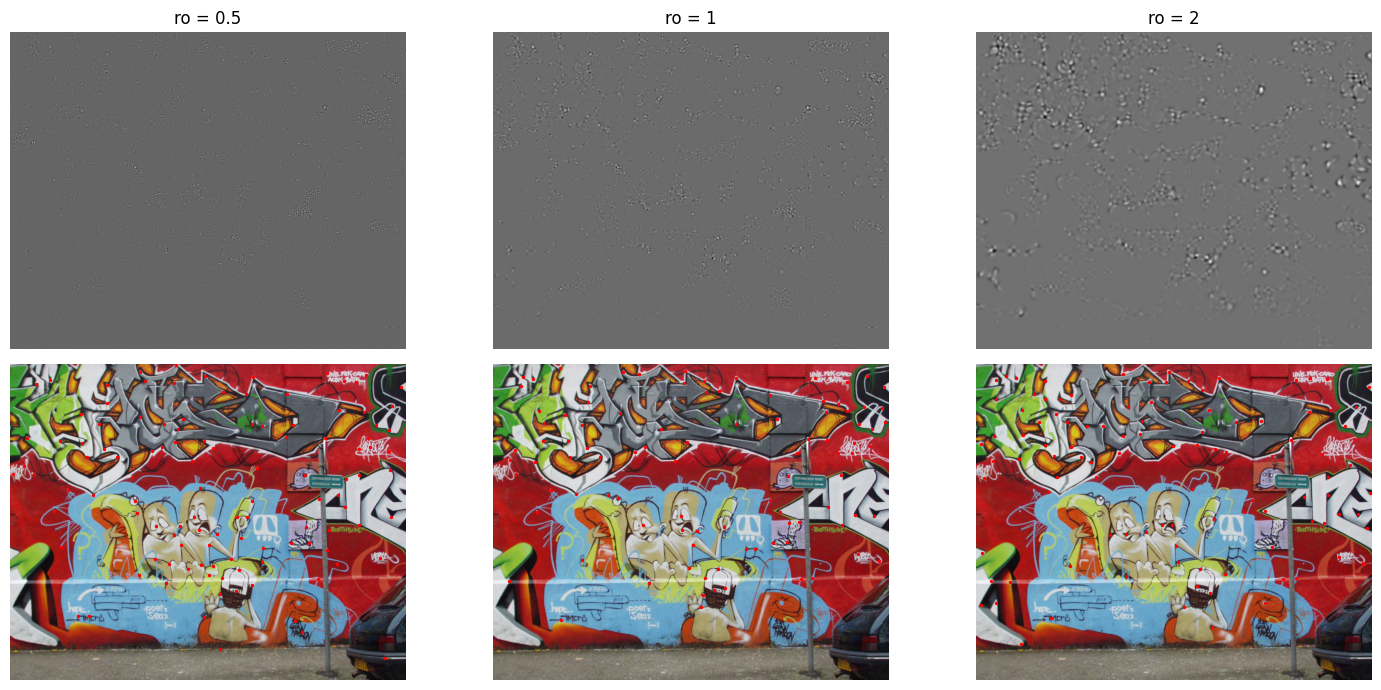

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import a4_utils
import random
from sklearn.neighbors import KDTree

def odvodi(image, sigma):
    G = a4_utils.gauss(sigma)
    D = a4_utils.gaussdx(sigma)
    D = D[::-1]

    Ix = a4_utils.convolve(image, G.T, D)
    Iy = a4_utils.convolve(image, G, D.T)
    Ixx = a4_utils.convolve(Ix, G.T, D)
    Iyy = a4_utils.convolve(Iy, G, D.T)
    Ixy = a4_utils.convolve(Ix, G, D.T)
    
    return Ix, Iy, Ixx, Ixy, Iyy

def plot_keypoints(image, keypoints):
    plt.imshow(image, cmap='gray')
    y, x = np.where(keypoints > 0)
    plt.scatter(x, y, c='red', s=2)
    plt.axis('off')

def hessian_points(image, sigma, threshold, box_size=35):
    G = a4_utils.gauss(sigma)[0]
    smoothed = cv2.filter2D(image, -1, G[:, None])
    smoothed = cv2.filter2D(smoothed, -1, G[None, :])
    Ix, Iy, Ixx, Ixy, Iyy = odvodi(smoothed, sigma)
    det_hessian = (Ixx * Iyy) - (Ixy ** 2)
    det_hessian = (det_hessian - np.min(det_hessian)) / (np.max(det_hessian) - np.min(det_hessian))
    thresholded = np.where(det_hessian > threshold, det_hessian, 0)
    kernel = np.ones((box_size, box_size))
    local_maxima = cv2.dilate(thresholded, kernel)
    keypoints = np.where(thresholded == local_maxima, thresholded, 0)
    return keypoints, det_hessian


image_path = 'data/graf/graf_a.jpg'
image = plt.imread(image_path)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float64) / 255

threshold = 0.6
hessian_keypoints_05, thresholded_05 = hessian_points(image_bw, 0.5, threshold)
hessian_keypoints_1, thresholded_1 = hessian_points(image_bw, 1, threshold)
hessian_keypoints_2, thresholded_2 = hessian_points(image_bw, 2, threshold)

plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.imshow(thresholded_05, cmap='gray')
plt.axis('off')
plt.title('ro = 0.5')

plt.subplot(2, 3, 2)
plt.imshow(thresholded_1, cmap='gray')
plt.axis('off')
plt.title('ro = 1')

plt.subplot(2, 3, 3)
plt.imshow(thresholded_2, cmap='gray')
plt.axis('off')
plt.title('ro = 2')

plt.subplot(2, 3, 4)
plot_keypoints(image, hessian_keypoints_05)

plt.subplot(2, 3, 5)
plot_keypoints(image, hessian_keypoints_1)

plt.subplot(2, 3, 6)
plot_keypoints(image, hessian_keypoints_2)

plt.tight_layout()
plt.show()



### What kind of structures in the image are detected by the algorithm? How does the parameter sigma affect the result?

The algorithm detects corners in the image. The parameter sigma is the standard deviation of the Gaussian filter used to compute the image gradients. A larger sigma will result in a smoother image and therefore less corners will be detected.

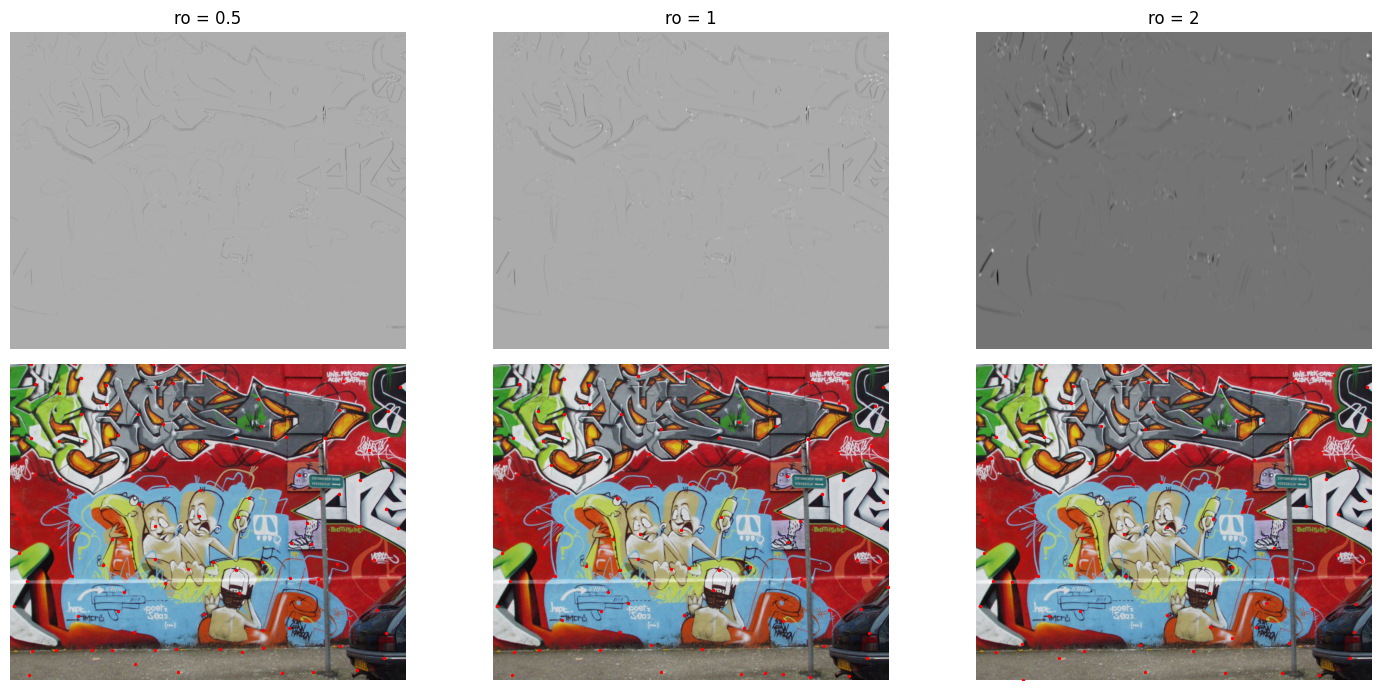

In [3]:
def harris_points(image, sigma, alpha, threshold, box_size=70):
    G_1 = a4_utils.gauss(1.6 * sigma)[0]
    Ix, Iy, Ixx, Ixy, Iyy = odvodi(image, sigma)
    Sxx = a4_utils.convolve(Ix**2, G_1)
    Syy = a4_utils.convolve(Iy**2, G_1)
    Sxy = a4_utils.convolve(Ix*Iy, G_1)
    det_C = Sxx * Syy - Sxy ** 2
    trace_C = Sxx + Syy
    R = det_C - alpha * trace_C ** 2
    R = (R - np.min(R)) / (np.max(R) - np.min(R))
    thresholded = np.where(R > threshold, R, 0)
    kernel = np.ones((box_size, box_size))
    local_maxima = cv2.dilate(thresholded, kernel)
    keypoints = np.where(thresholded == local_maxima, thresholded, 0)
    return keypoints, R

alpha = 0.06
threshold = 0.2
harris_keypoints_05, R_05 = harris_points(image_bw, 0.5, alpha, threshold)
harris_keypoints_1, R_1 = harris_points(image_bw, 1, alpha, threshold)
harris_keypoints_2, R_2 = harris_points(image_bw, 2, alpha, threshold)

plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.imshow(R_05, cmap='gray')
plt.axis('off')
plt.title('ro = 0.5')

plt.subplot(2, 3, 2)
plt.imshow(R_1, cmap='gray')
plt.axis('off')
plt.title('ro = 1')

plt.subplot(2, 3, 3)
plt.imshow(R_2, cmap='gray')
plt.axis('off')
plt.title('ro = 2')

plt.subplot(2, 3, 4)
plot_keypoints(image, harris_keypoints_05)

plt.subplot(2, 3, 5)
plot_keypoints(image, harris_keypoints_1)

plt.subplot(2, 3, 6)
plot_keypoints(image, harris_keypoints_2)

plt.tight_layout()
plt.show()


## Exercise 2: Matching local regions

56 56
60 60
[[0, np.int64(0)], [1, np.int64(1)], [2, np.int64(3)], [3, np.int64(6)], [4, np.int64(4)], [5, np.int64(4)], [6, np.int64(2)], [7, np.int64(10)], [8, np.int64(10)], [9, np.int64(10)], [10, np.int64(8)], [11, np.int64(9)], [12, np.int64(16)], [13, np.int64(8)], [14, np.int64(13)], [15, np.int64(12)], [16, np.int64(14)], [17, np.int64(15)], [18, np.int64(20)], [19, np.int64(19)], [20, np.int64(21)], [21, np.int64(21)], [22, np.int64(24)], [23, np.int64(22)], [24, np.int64(23)], [25, np.int64(24)], [26, np.int64(25)], [27, np.int64(21)], [28, np.int64(25)], [29, np.int64(29)], [30, np.int64(35)], [31, np.int64(30)], [32, np.int64(30)], [33, np.int64(30)], [34, np.int64(31)], [35, np.int64(32)], [36, np.int64(33)], [37, np.int64(34)], [38, np.int64(35)], [39, np.int64(40)], [40, np.int64(41)], [41, np.int64(42)], [42, np.int64(45)], [43, np.int64(46)], [44, np.int64(47)], [45, np.int64(48)], [46, np.int64(49)], [47, np.int64(52)], [48, np.int64(51)], [49, np.int64(54)], [50, np

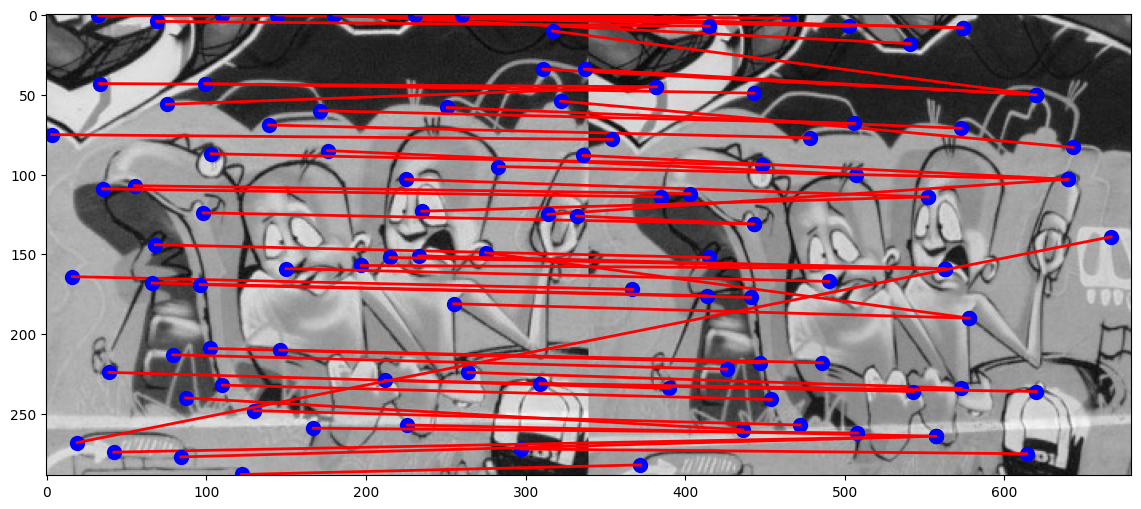

In [4]:
def hellinger_distance(h1, h2):
    return np.sqrt(0.5 * np.sum((np.sqrt(h1) - np.sqrt(h2)) ** 2))

def find_correspondences(desc1, desc2):
    matches = []
    for i, d1 in enumerate(desc1):
        distances = [hellinger_distance(d1, d2) for d2 in desc2]
        best_match = np.argmin(distances)
        matches.append([i, best_match])
    return matches

image_path = 'data/graf/graf_a_small.jpg'
image = plt.imread(image_path)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float64) / 255

image_path2 = 'data/graf/graf_b_small.jpg'
image2 = plt.imread(image_path2)
image_bw2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY).astype(np.float64) / 255

feature_points = harris_points(image_bw, 1, 0.06, 0.2, 35)[0]
feature_points2 = harris_points(image_bw2, 1, 0.06, 0.2, 35)[0]

Y1, X1 = np.where(feature_points > 0)
Y2, X2 = np.where(feature_points2 > 0)

print(len(X1), len(Y1))
print(len(X2), len(Y2))

desc1 = a4_utils.simple_descriptors(image_bw, Y1, X1)
desc2 = a4_utils.simple_descriptors(image_bw2, Y2, X2)

matches = find_correspondences(desc1, desc2)
print(matches)

pts1 = np.array([[X1[match[0]], Y1[match[0]]] for match in matches])
pts2 = np.array([[X2[match[1]], Y2[match[1]]] for match in matches])

plt.figure(figsize=(14, 7))
a4_utils.display_matches(image_bw, pts1, image_bw2, pts2)


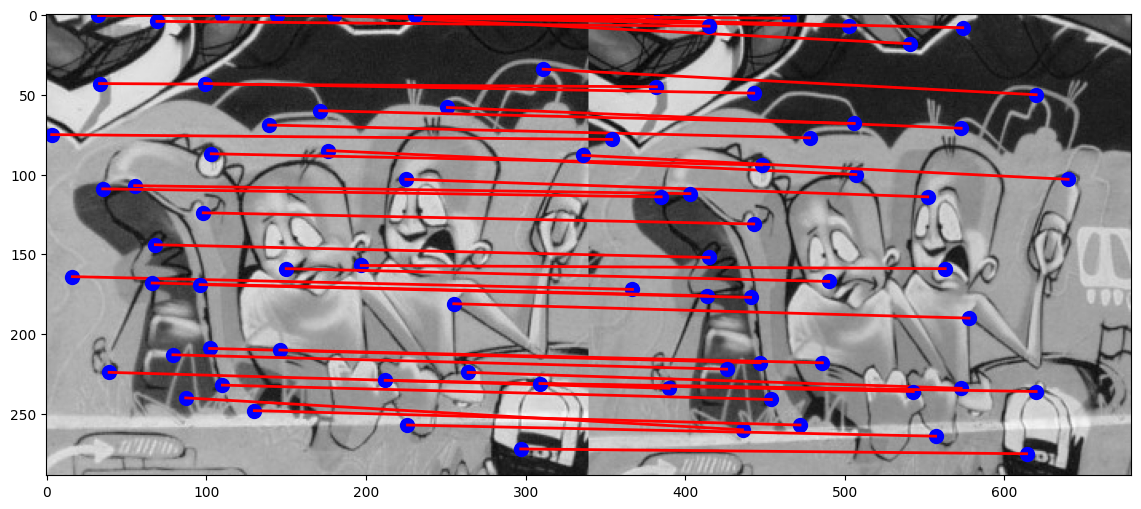

In [5]:
def find_matches(image1, image2, sigma, alpha, threshold):
    feature_points1 = harris_points(image1, sigma, alpha, threshold, 35)[0]
    feature_points2 = harris_points(image2, sigma, alpha, threshold, 35)[0]
    Y1, X1 = np.where(feature_points1 > 0)
    Y2, X2 = np.where(feature_points2 > 0)
    desc1 = a4_utils.simple_descriptors(image1, Y1, X1)
    desc2 = a4_utils.simple_descriptors(image2, Y2, X2)
    matches1 = find_correspondences(desc1, desc2)
    matches2 = find_correspondences(desc2, desc1)

    true_matches = []
    for match1 in matches1:
        match2 = matches2[match1[1]]
        if match2[1] == match1[0]:
            true_matches.append(match1)
    
    pts1 = np.array([[X1[match[0]], Y1[match[0]]] for match in true_matches])
    pts2 = np.array([[X2[match[1]], Y2[match[1]]] for match in true_matches])

    return pts1, pts2

image_path = 'data/graf/graf_a_small.jpg'
image = plt.imread(image_path)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float64) / 255

image_path2 = 'data/graf/graf_b_small.jpg'
image2 = plt.imread(image_path2)
image_bw2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY).astype(np.float64) / 255

pts1, pts2 = find_matches(image_bw, image_bw2, 1, 0.06, 0.2)

plt.figure(figsize=(14, 7))
a4_utils.display_matches(image_bw, pts1, image_bw2, pts2)

### What do you notice when visualizing the correspondences? How accurate are the matches?

The correspondences are more accurate when we use symmetric descriptors. But the matches are not perfect, there are some outliers.

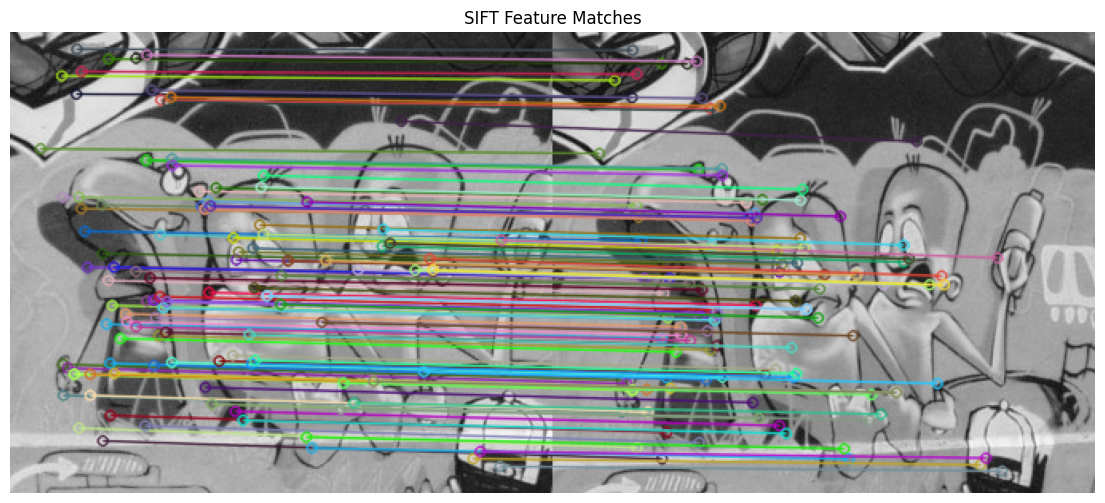

In [13]:
sift = cv2.SIFT_create()

image_bw = (image_bw * 255).astype(np.uint8) if image_bw.max() <= 1 else image_bw.astype(np.uint8)
image_bw2 = (image_bw2 * 255).astype(np.uint8) if image_bw2.max() <= 1 else image_bw2.astype(np.uint8)

keypoints1, descriptors1 = sift.detectAndCompute(image_bw, None)
keypoints2, descriptors2 = sift.detectAndCompute(image_bw2, None)

image1_with_keypoints = cv2.drawKeypoints(image_bw, keypoints1, None)
image2_with_keypoints = cv2.drawKeypoints(image_bw2, keypoints2, None)

FLANN_INDEX_KDTREE = 2
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.3 * n.distance:
        good_matches.append(m)

image_matches = cv2.drawMatches(image_bw, keypoints1, image_bw2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(14, 7))
plt.imshow(image_matches)
plt.title('SIFT Feature Matches')
plt.axis('off')
plt.show()

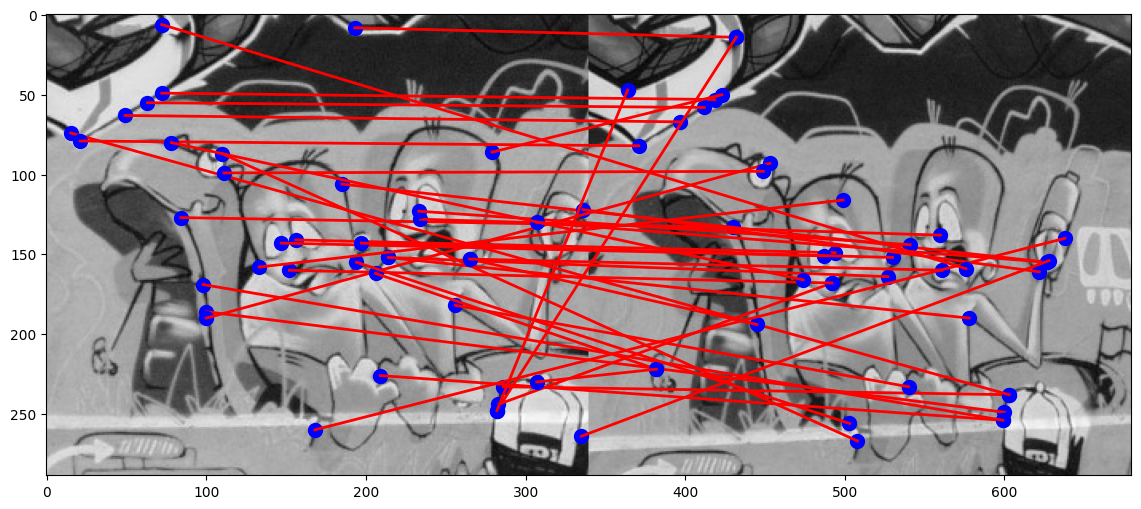

In [ ]:
def gaussian_blur(image, sigma):
    kernel_size = max(3, int(6 * sigma + 1) | 1)
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def create_scale_space(image, num_octaves, num_intervals, sigma=1): # Gaussove slike z različnimi sigmami 
    k = 2 ** (1 / num_intervals)
    scale_space = []
    for octave in range(num_octaves):
        gaussian_images = []
        sigma = sigma
        for interval in range(num_intervals + 3):
            blurred = gaussian_blur(image, sigma)
            gaussian_images.append(blurred)
            sigma *= k
        scale_space.append(gaussian_images)
        image = cv2.pyrDown(image)
    return scale_space


def create_DoG(scale_space): # Razlika gaussovih slik z različnimi sigmami (DoG = Difference of Gaussians)
    dog_space = []
    for octave in scale_space:
        dog_images = [octave[i + 1] - octave[i] for i in range(len(octave) - 1)]
        dog_space.append(dog_images)
    return dog_space

def detect_extrema_optimized(dog_space, contrast_threshold=0.03): # Iskanje ekstremov v DoG prostoru - min in max
    keypoints = []
    for o, octave in enumerate(dog_space):
        for i in range(1, len(octave) - 1):
            prev_img, curr_img, next_img = octave[i - 1], octave[i], octave[i + 1]

            for x in range(1, curr_img.shape[0] - 1):
                for y in range(1, curr_img.shape[1] - 1):
                    region = np.stack([
                        prev_img[x-1:x+2, y-1:y+2],
                        curr_img[x-1:x+2, y-1:y+2],
                        next_img[x-1:x+2, y-1:y+2]
                    ])
                    
                    value = curr_img[x, y]
                    if value > contrast_threshold and (value == np.max(region) or value == np.min(region)):
                        keypoints.append((o, i, x, y))
    return keypoints


def refine_keypoints(keypoints, dog_space, contrast_threshold=0.03, edge_threshold=10): # izločanje točk z nizkim kontrastom in točk na robovih
    refined_keypoints = []
    for o, i, x, y in keypoints:
        value = dog_space[o][i][x, y]
        if abs(value) < contrast_threshold:
            continue

        dx = dog_space[o][i][x+1, y] - dog_space[o][i][x-1, y]
        dy = dog_space[o][i][x, y+1] - dog_space[o][i][x, y-1]
        dxx = dog_space[o][i][x+1, y] + dog_space[o][i][x-1, y] - 2 * value
        dyy = dog_space[o][i][x, y+1] + dog_space[o][i][x, y-1] - 2 * value
        dxy = (dog_space[o][i][x+1, y+1] - dog_space[o][i][x-1, y+1] - 
               dog_space[o][i][x+1, y-1] + dog_space[o][i][x-1, y-1]) / 4

        tr_h = dxx + dyy
        det_h = dxx * dyy - dxy ** 2
        if det_h <= 0 or (tr_h ** 2 / det_h) >= ((edge_threshold + 1) ** 2 / edge_threshold):
            continue

        refined_keypoints.append((o, i, x, y))
    return refined_keypoints

def assign_orientation(keypoints, scale_space): # določanje orientacije točk
    oriented_keypoints = []
    for o, i, x, y in keypoints:
        image = scale_space[o][i]
        magnitude = np.sqrt(
            (image[x+1, y] - image[x-1, y]) ** 2 +
            (image[x, y+1] - image[x, y-1]) ** 2
        )
        orientation = np.arctan2(
            image[x, y+1] - image[x, y-1],
            image[x+1, y] - image[x-1, y]
        )
        oriented_keypoints.append((o, i, x, y, magnitude, orientation))
    return oriented_keypoints

def compute_descriptors(keypoints, scale_space, window_size=16, num_bins=8):
    descriptors = []
    bin_width = 360 / num_bins
    for o, i, x, y, _, orientation in keypoints:
        image = scale_space[o][i]
        descriptors_window = []
        
        half_window = window_size // 2
        gaussian_weight = cv2.getGaussianKernel(window_size, sigma=half_window / 2)
        gaussian_weight = gaussian_weight @ gaussian_weight.T

        if (x - half_window < 0 or x + half_window >= image.shape[0] or
                y - half_window < 0 or y + half_window >= image.shape[1]):
            continue

        for sub_x in range(-half_window, half_window, window_size // 4):
            for sub_y in range(-half_window, half_window, window_size // 4):
                histogram = np.zeros(num_bins)
                for dx in range(window_size // 4):
                    for dy in range(window_size // 4):
                        pixel_x = x + sub_x + dx
                        pixel_y = y + sub_y + dy

                        if (0 <= pixel_x < image.shape[0] and
                                0 <= pixel_y < image.shape[1]):
                            grad_x = image[pixel_x+1, pixel_y] - image[pixel_x-1, pixel_y]
                            grad_y = image[pixel_x, pixel_y+1] - image[pixel_x, pixel_y-1]
                            magnitude = np.sqrt(grad_x**2 + grad_y**2)
                            angle = np.degrees(np.arctan2(grad_y, grad_x)) - orientation
                            angle = angle % 360

                            bin_idx = int(angle // bin_width)
                            histogram[bin_idx] += magnitude * gaussian_weight[dx, dy]
                
                descriptors_window.extend(histogram)
        
        descriptors_window = np.array(descriptors_window)
        descriptors_window = (descriptors_window - np.min(descriptors_window)) / (np.max(descriptors_window) - np.min(descriptors_window))
        
        descriptors.append(descriptors_window)
    return descriptors

def find_correspondences1(descriptors1, descriptors2, match_threshold=0.8):
    tree = KDTree(descriptors2) # hitrejše iskanje najbližjih sosedov
    matches = []
    for i, descriptor in enumerate(descriptors1):
        distances, indices = tree.query([descriptor], k=2)
        if distances[0][0] < match_threshold * distances[0][1]:
            matches.append((i, indices[0][0]))
    return matches


def sift_find_matches(image1, image2, num_octaves=8, num_intervals=5, match_threshold=0.8):
    scale_space1 = create_scale_space(image1, num_octaves, num_intervals)
    dog_space1 = create_DoG(scale_space1)
    scale_space2 = create_scale_space(image2, num_octaves, num_intervals)
    dog_space2 = create_DoG(scale_space2)

    keypoints1 = detect_extrema_optimized(dog_space1)
    keypoints1 = refine_keypoints(keypoints1, dog_space1)
    oriented_keypoints1 = assign_orientation(keypoints1, scale_space1)
    keypoints2 = detect_extrema_optimized(dog_space2)
    keypoints2 = refine_keypoints(keypoints2, dog_space2)
    oriented_keypoints2 = assign_orientation(keypoints2, scale_space2)

    descriptors1 = compute_descriptors(oriented_keypoints1, scale_space1)
    descriptors2 = compute_descriptors(oriented_keypoints2, scale_space2)

    matches1 = find_correspondences1(descriptors1, descriptors2)

    '''
    print(len(matches1), len(matches2))
    true_matches = []
    for i, match1 in enumerate(matches1):
        print(match1)
        if match1[1] < len(matches2):  # Preverite veljavnost indeksa
            print("Ja", matches2[match1[1]])
            if matches2[match1[1]] == (i, match1[1]):
                true_matches.append(match1)

    pts1 = np.array([[oriented_keypoints1[m[0]][3], oriented_keypoints1[m[0]][2]] for m in true_matches])
    pts2 = np.array([[oriented_keypoints2[m[1]][3], oriented_keypoints2[m[1]][2]] for m in true_matches])

    plt.figure(figsize=(14, 7))
    a4_utils.display_matches(image1, pts1, image2, pts2)
    '''
    valid_matches1 = [(m[0], m[1]) for m in matches1 if m[1] < len(oriented_keypoints2)]

    pts1 = np.array([[oriented_keypoints1[m[0]][3], oriented_keypoints1[m[0]][2]] for m in valid_matches1])
    pts2 = np.array([[oriented_keypoints2[m[1]][3], oriented_keypoints2[m[1]][2]] for m in valid_matches1])

    plt.figure(figsize=(14, 7))
    a4_utils.display_matches(image1, pts1, image2, pts2)


image_path1 = 'data/graf/graf_a_small.jpg'
image_path2 = 'data/graf/graf_b_small.jpg'

image1 = plt.imread(image_path1)
image2 = plt.imread(image_path2)
image_bw1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY).astype(np.float64) / 255
image_bw2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY).astype(np.float64) / 255

sift_find_matches(image_bw1, image_bw2)


In [9]:
def stabilize_video(input_video_path, output_video_path, alpha=0.2):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Cannot open video.")
        return
    
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))
    
    sift = cv2.SIFT_create()
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    
    ret, first_frame = cap.read()
    
    first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    first_keypoints, first_descriptors = sift.detectAndCompute(first_gray, None)
    
    prev_transform = np.eye(3, dtype=np.float32)
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        keypoints, descriptors = sift.detectAndCompute(gray, None)
        matches = bf.match(first_descriptors, descriptors)
        
        matches = sorted(matches, key=lambda x: x.distance)
        
        src_pts = np.float32([first_keypoints[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
        
        matrix, _ = cv2.estimateAffinePartial2D(src_pts, dst_pts)
        
        if matrix is not None:
            matrix = np.vstack([matrix, [0, 0, 1]])
            prev_transform = prev_transform * (1 - alpha) + matrix * alpha
        else:
            matrix = prev_transform
        
        inv_transform = np.linalg.inv(prev_transform)
        stabilized_frame = cv2.warpAffine(frame, inv_transform[:2], (frame_width, frame_height))
        out.write(stabilized_frame)
    
    cap.release()
    out.release()

# resolucija videa je 518x688 in 30fps
input_video_path = "data/video.mp4"
output_video_path = "data/stabilized_video.mp4"
stabilize_video(input_video_path, output_video_path)

## Exercise 3: Homography estimation

### Looking at the equation above, which parameters account for translation and which for rotation and scale?

- **Translation**: Parameters p3 and p4 account for translation because they are added as constants to the equations.
- **Rotation and scale**: Parameters p1 and p2 account for rotation and scale as they modify the coordinates through multiplication and combination.

### Write down a sketch of an algorithm to determine similarity transform from a set of point correspondences P = [(xr1, xt1), (xr2, xt2), ... (xrn, xtn)].

For each pair of points (xr, xt) in P: create two equations: xt = p1 * xr + p2 * yr + p3 and yt = -p2 * xr + p1 * yr + p4. Then, stack all the equations in a matrix A and solve the system of equations using the least squares method.

- `A` = [[xr1, -yr1, 1, 0], [yr1, xr1, 0, 1], [xr2, -yr2, 1, 0], [yr2, xr2, 0, 1], ..., [xrn, -yrn, 1, 0], [yrn, xrn, 0, 1]]
- `p` = [p1, p2, p3, p4]
- `b` = [xt1, yt1, xt2, yt2, ..., xtn, ytn]

p = (A^T * A)^-1 * A^T * b

`p` is the similarity transform matrix.

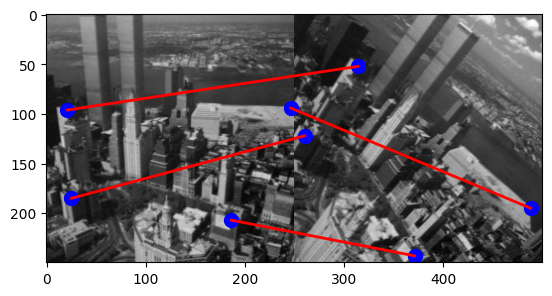

Homography matrix is correct!


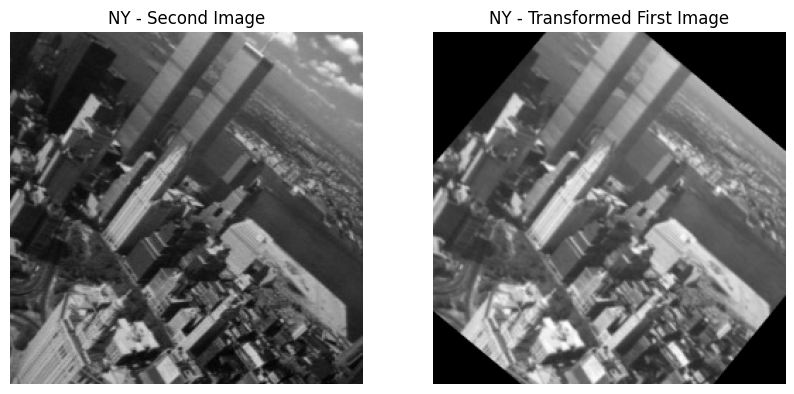

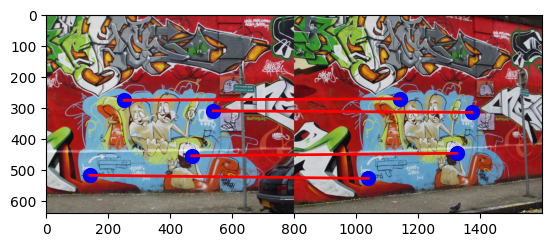

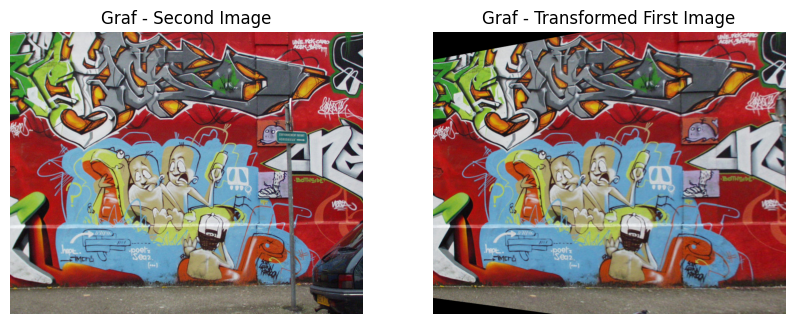

In [14]:
def estimate_homography(points1, points2):
    A = []
    for (xr, yr), (xt, yt) in zip(points1, points2):
        A.append([xr, yr, 1, 0, 0, 0, -xr*xt, -yr*xt, -xt])
        A.append([0, 0, 0, xr, yr, 1, -xr*yt, -yr*yt, -yt])
    A = np.array(A)
    U, S, Vt = np.linalg.svd(A)
    h = Vt[-1] / Vt[-1, -1]
    H = h.reshape(3, 3)
    return H

image1_path = 'data/newyork/newyork_a.jpg'
image2_path = 'data/newyork/newyork_b.jpg'
image1 = plt.imread(image1_path)
image2 = plt.imread(image2_path)

image3_path = 'data/graf/graf_a.jpg'
image4_path = 'data/graf/graf_b.jpg'
image3 = plt.imread(image3_path)
image4 = plt.imread(image4_path)

points = np.loadtxt('data/newyork/newyork.txt')
points1 = points[:, :2]
points2 = points[:, 2:]

points0 = np.loadtxt('data/graf/graf.txt')
points3 = points0[:, :2]
points4 = points0[:, 2:]

a4_utils.display_matches(image1, points1, image2, points2)

H = estimate_homography(points1, points2)
H_check = np.loadtxt('data/newyork/H.txt')
H_razlika = np.abs(H - H_check)
if np.all(H_razlika < 1e-3):
    print('Homography matrix is correct!')
else:
    print('Homography matrix is incorrect!')

transformed_image = cv2.warpPerspective(image1, H, (image2.shape[1], image2.shape[0]))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('NY - Second Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('NY - Transformed First Image')
plt.axis('off')

plt.show()

a4_utils.display_matches(image3, points3, image4, points4)
H1 = estimate_homography(points4, points3)
transformed_image1 = cv2.warpPerspective(image4, H1, (image3.shape[1], image3.shape[0]))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image3, cmap='gray')
plt.title('Graf - Second Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image1, cmap='gray')
plt.title('Graf - Transformed First Image')
plt.axis('off')

plt.show()

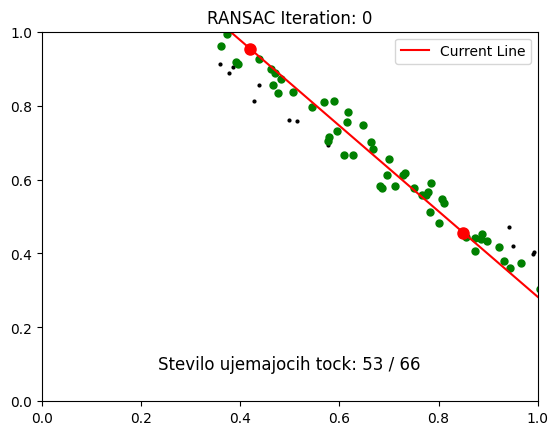

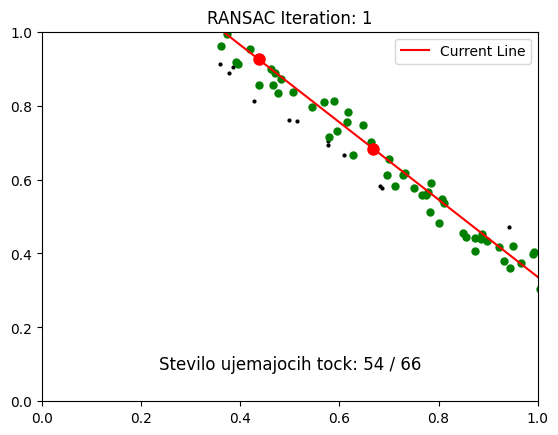

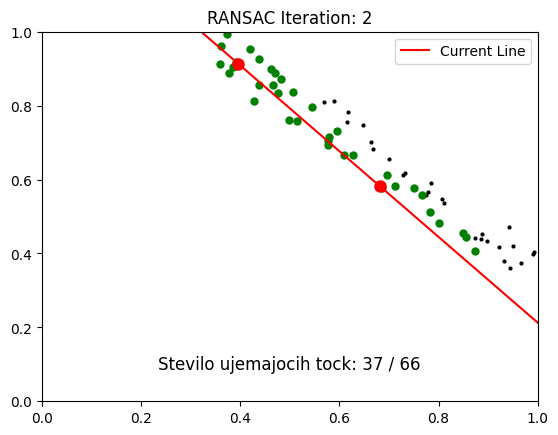

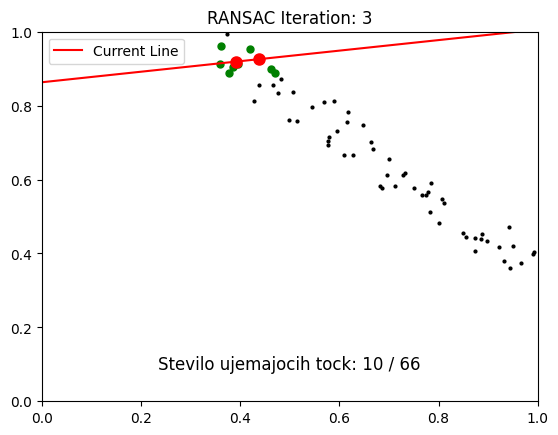

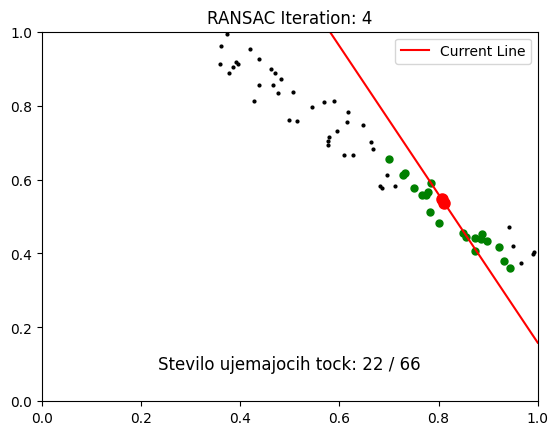

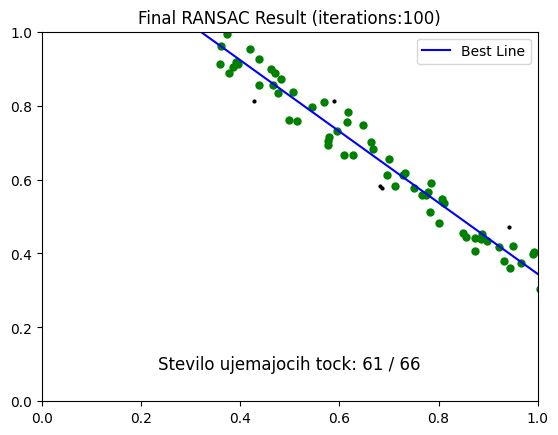

In [11]:
def calculate_distance(point, line):
    x, y = point
    k, n = line
    # ax + by + c = 0 -> dist = |ax + by + c| / sqrt(a^2 + b^2) -> a = k, b = -1, c = n
    dist = abs(k * x - y + n) / np.sqrt(k**2 + 1) # y = kx + n -> kx - y + n = 0 -> |kx - y + n| / sqrt(k^2 + 1)
    return dist

def ransac_line_fitting(points, threshold, max_iterations):
    best_line = None
    best_inliers = []

    for i in range(max_iterations):
        p1, p2 = random.sample(points, 2)
        k, n = a4_utils.get_line_equation(p1, p2)

        inliers = []
        for point in points:
            if calculate_distance(point, (k, n)) < threshold:
                inliers.append(point)

        if len(inliers) > len(best_inliers):
            best_line = (k, n)
            best_inliers = inliers

        if i < 5:
            visualize_ransac_step(points, p1, p2, (k, n), inliers, i)

    return best_line, best_inliers

def visualize_ransac_step(points, p1, p2, line, inliers, i):
    plt.title(f"RANSAC Iteration: {i}")
    plt.axis([0, 1, 0, 1])
    plt.text(0.5, 0.1, f'Stevilo ujemajocih tock: {len(inliers)} / {len(points)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

    for point in points:
        plt.plot(point[0], point[1], 'k.', markersize=4)

    for inlier in inliers:
        plt.plot(inlier[0], inlier[1], 'go', markersize=5)

    x_vals = np.linspace(0, 1, 100)
    y_vals = line[0] * x_vals + line[1]
    plt.plot(x_vals, y_vals, 'r-', label='Current Line')

    plt.plot(p1[0], p1[1], 'ro', markersize=8)
    plt.plot(p2[0], p2[1], 'ro', markersize=8)

    plt.legend()
    plt.pause(0.1)

def line_fitting_ransac():
    np.random.seed(42)

    N = 100
    noise_scale = 0.1

    start = np.random.random(2)
    end = np.random.random(2)
    true_k, true_n = a4_utils.get_line_equation(start, end)

    points = []
    for x in np.linspace(0, 1, num=N):
        y = true_k * x + true_n
        x += (np.random.random() - 0.5) * noise_scale
        y += (np.random.random() - 0.5) * noise_scale
        if 0 <= y <= 1:
            points.append((x, y))

    threshold = 0.05
    max_iterations = 100
    best_line, best_inliers = ransac_line_fitting(points, threshold, max_iterations)

    plt.title("Final RANSAC Result (iterations:" + str(max_iterations) + ")")
    plt.axis([0, 1, 0, 1])
    plt.text(0.5, 0.1, f'Stevilo ujemajocih tock: {len(best_inliers)} / {len(points)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')

    for point in points:
        plt.plot(point[0], point[1], 'k.', markersize=4)

    for inlier in best_inliers:
        plt.plot(inlier[0], inlier[1], 'go', markersize=5)

    x_vals = np.linspace(0, 1, 100)
    y_vals = best_line[0] * x_vals + best_line[1]
    plt.plot(x_vals, y_vals, 'b-', label='Best Line')

    plt.legend()
    plt.show()


line_fitting_ransac()


### How many iterations on average did you need to find a good solution? How does the parameter choice for both the keypoint detector and RANSAC itself influence the performance (both quality and speed)?

I needed around 20 to 50 iterations to find a good solution. The parameter choice for the keypoint detector influences the number of inliers and outliers. The parameter choice for RANSAC influences the number of iterations and the threshold for the inliers. They both influence the performance in terms of quality and speed (less iterations to find a good solution).

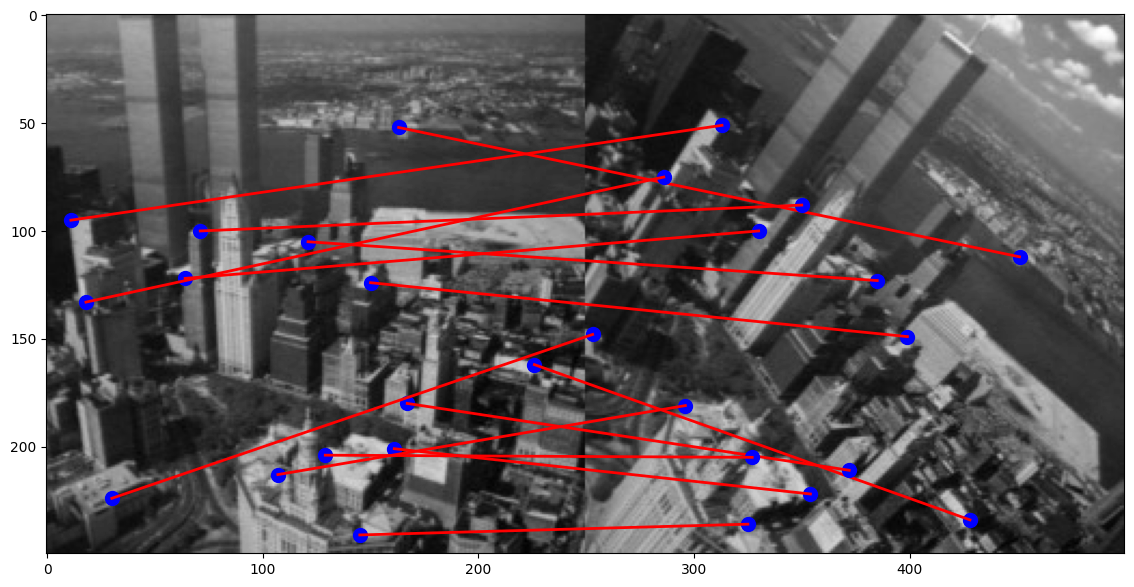

Iteration 0: Inlier ratio = 0.2857142857142857, estimated iterations = 688
Iteration 2: Inlier ratio = 0.42857142857142855, estimated iterations = 134
Iteration 6: Inlier ratio = 0.5714285714285714, estimated iterations = 40
Iteration 11: Inlier ratio = 0.6428571428571429, estimated iterations = 24
Iteration 16: Inlier ratio = 0.6428571428571429, estimated iterations = 24


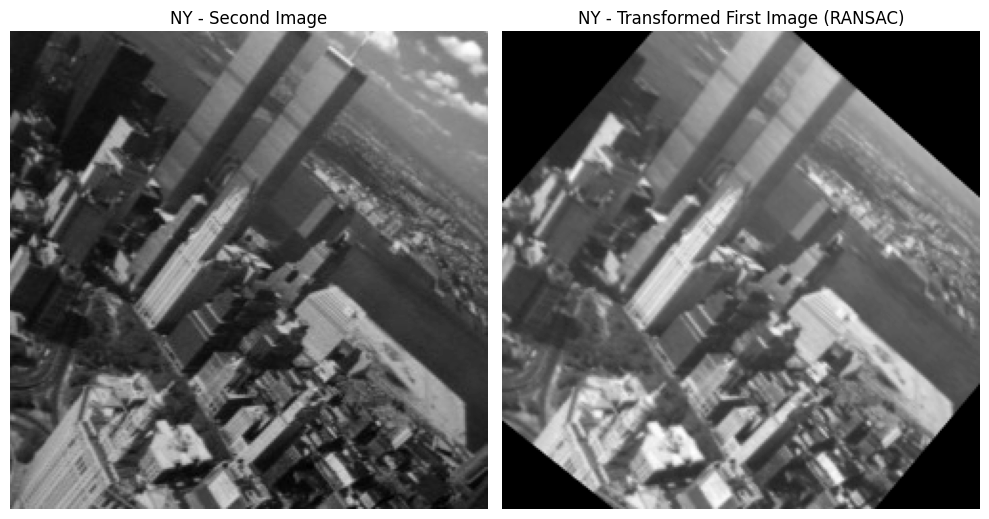

In [12]:
def calculate_reprojection_error(H, points1, points2):
    points1_homogeneous = np.hstack((points1, np.ones((points1.shape[0], 1)))) 
    projected_points2_homogeneous = (H @ points1_homogeneous.T).T # Project points from the first image to the second image
    projected_points2 = projected_points2_homogeneous[:, :2] / projected_points2_homogeneous[:, 2, np.newaxis] # Normalize homogeneous coordinates
    errors = np.linalg.norm(points2 - projected_points2, axis=1) # Euclidean distance
    return np.average(errors)

def ransac_iterations(inlier_ratio, num_points=4, desired_prob=0.99):
    # pfail = (1 - w^n)^k -> log(pfail) = k * log(1 - w^n) -> k = log(pfail) / log(1 - w^n) -> pfail = 1 - desired_prob
    # N = log(1 - p) / log(1 - w^n) -> p = desired probability, w = inlier ratio, n = number of points
    return int(np.log(1 - desired_prob) / np.log(1 - inlier_ratio**num_points))

def ransac_homography_adaptive(points1, points2, threshold, max_iterations, desired_prob=0.99):
    best_H = None
    best_inliers = []
    best_error = float('inf')
    inlier_ratio = 0
    num_iterations = max_iterations

    for i in range(max_iterations):
        indices = np.random.choice(len(points1), 4, replace=False)
        selected_points1 = points1[indices]
        selected_points2 = points2[indices]

        H = estimate_homography(selected_points1, selected_points2)
        errors = []
        inliers = []
        for j in range(len(points1)):
            point1 = np.append(points1[j], 1)
            projected_point2 = H @ point1
            projected_point2 /= projected_point2[2]
            error = np.linalg.norm(points2[j] - projected_point2[:2])
            if error < threshold:
                inliers.append(i)
                errors.append(error)

        error_avg = np.average(errors) if errors else float('inf')

        if len(inliers) > len(best_inliers) or (len(inliers) == len(best_inliers) and error_avg < best_error): # bolsi w ali enak in manjsa napaka
            best_H = H
            best_inliers = inliers
            best_error = error_avg
            inlier_ratio = len(inliers) / len(points1)
            num_iterations = ransac_iterations(inlier_ratio, desired_prob=desired_prob) # Ponovno izracunaj stevilo iteracij
            print(f"Iteration {i}: Inlier ratio = {inlier_ratio}, estimated iterations = {num_iterations}")

        if i >= num_iterations:
            break

    return best_H, best_inliers

image1_path = 'data/newyork/newyork_a.jpg'
image2_path = 'data/newyork/newyork_b.jpg'
image_bw1 = plt.imread(image1_path).astype(np.float64) / 255
image_bw2 = plt.imread(image2_path).astype(np.float64) / 255

points1, points2 = find_matches(image_bw1, image_bw2, 1, 0.06, 0.4) # harris points

plt.figure(figsize=(14, 7))
a4_utils.display_matches(image_bw1, points1, image_bw2, points2)

threshold = 5
max_iterations = 1000 # Po iteracijah se zmanjsuje
H_ransac, inliers = ransac_homography_adaptive(points1, points2, threshold, max_iterations)
transformed_image_ransac = cv2.warpPerspective(image1, H_ransac, (image2.shape[1], image2.shape[0]))

plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('NY - Second Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image_ransac, cmap='gray')
plt.title('NY - Transformed First Image (RANSAC)')
plt.axis('off')

plt.tight_layout()
plt.show()

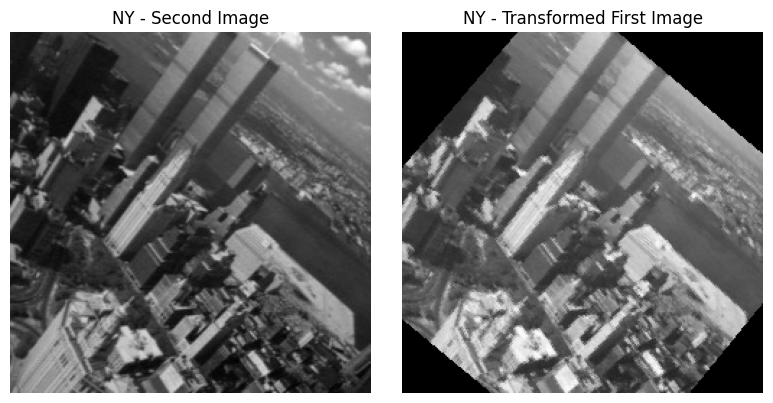

In [19]:
def warp_perspective(image, H):
    h, w = image.shape[:2]
    output_image = np.zeros_like(image)

    y_coords, x_coords = np.indices((h, w))
    homogeneous_coords = np.stack([x_coords.ravel(), y_coords.ravel(), np.ones_like(x_coords).ravel()])

    H = np.linalg.inv(H)
    transformed_coords = H @ homogeneous_coords # Transformacija
    transformed_coords /= transformed_coords[2, :] # Normalizacija

    x_transformed = transformed_coords[0, :].astype(int)
    y_transformed = transformed_coords[1, :].astype(int)

    valid_indices = (x_transformed >= 0) & (x_transformed < w) & (y_transformed >= 0) & (y_transformed < h)
    output_image[y_coords.ravel()[valid_indices], x_coords.ravel()[valid_indices]] = image[y_transformed[valid_indices], x_transformed[valid_indices]]

    return output_image

image_path1 = 'data/newyork/newyork_a.jpg'
image_path2 = 'data/newyork/newyork_b.jpg'
image1 = plt.imread(image_path1).astype(np.float64) / 255
image2 = plt.imread(image_path2).astype(np.float64) / 255

points = np.loadtxt('data/newyork/newyork.txt')
points1 = points[:, :2]
points2 = points[:, 2:]

H = estimate_homography(points1, points2)
transformed_image_custom = warp_perspective(image1, H)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('NY - Second Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image_custom, cmap='gray')
plt.title('NY - Transformed First Image')
plt.axis('off')

plt.tight_layout()
plt.show()